## Problem Statement: House Price Prediction

### To find out the various factors that influences a home buyer to buy their dream house or the main factors that contribute to the SalePrice of a house.

In [42]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from datetime import date

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')

# Set seed for reproducibility
np.random.seed(42)


### 1. Load the data

In [43]:
# loading the dataset
houseData = pd.read_csv("train.csv")
houseTest = pd.read_csv("test.csv")

In [44]:
#Checking train dataset info
houseData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [45]:
#Checking test dataset info
houseTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### 2. Data Exploration and Cleaning

In [46]:
# Displaying the first few rows of the houseData dataframe
houseData.head()

# Function to find the missing columns in the test dataset compared to the train dataset
def find_missing_columns(test_df, train_df):
    """
    Find and print the columns present in the train dataset but missing in the test dataset.
    
    Args:
    test_df (DataFrame): Test dataset.
    train_df (DataFrame): Train dataset.
    """
    test_cols = set(test_df.columns)
    train_cols = set(train_df.columns)
    missing_columns = train_cols - test_cols
    print("Missing columns in the test dataset compared to the train dataset:")
    print(missing_columns)

# Calling the find_missing_columns function
find_missing_columns(houseTest, houseData)



Missing columns in the test dataset compared to the train dataset:
{'SalePrice'}


In [47]:
def remove_unique_value_columns(data):
    """
    Remove columns from the dataframe that have unique values in them.
    
    Args:
    data (DataFrame): Input dataframe.
    
    Returns:
    DataFrame: DataFrame with columns having unique values removed.
    """
    initial_shape = data.shape
    data = data.loc[:, data.nunique() != 1]
    print("Data shape after removing columns with unique values:", data.shape)
    print(data.head())
    return data

houseData = remove_unique_value_columns(houseData)


Data shape after removing columns with unique values: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  Y

In [48]:
def write_prediction(prediction, output_file):
    """
    Write predicted SalePrice values for test data to a CSV file.
    
    Args:
    prediction (array-like): Predicted SalePrice values.
    output_file (str): Name of the output CSV file.
    """
    Id = np.array(houseTest["Id"]).astype(int)
    solution = pd.DataFrame(prediction, index=Id, columns=["SalePrice"])
    solution.to_csv(output_file, index_label="Id")

# Example usage:
# write_prediction(predicted_values, "predicted_sale_prices.csv")



In [49]:
#Remove any rows with duplicate data
len(houseData) - len(houseData.drop_duplicates())
column_difference(houseTest,houseData)

Index(['SalePrice'], dtype='object')


In [50]:
def calculate_missing_data_percentage(dataframe):
    """
    Calculates the percentage of missing values for each column in the DataFrame.

    Args:
    - dataframe (DataFrame): The input DataFrame containing the data.

    Returns:
    - None: Prints the percentage of missing values for each column.
    """
    missing_data = dataframe[dataframe.columns[dataframe.isnull().any()]].isna().sum()
    missing_percentage = (missing_data / len(dataframe)) * 100
    print(missing_percentage)

# Calculate missing data percentages for houseData DataFrame
print("Missing data percentages for houseData:")
calculate_missing_data_percentage(houseData)

# Calculate missing data percentages for houseTest DataFrame
print("\n\nMissing data percentages for houseTest:")
calculate_missing_data_percentage(houseTest)


Missing data percentages for houseData:
LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


Missing data percentages for houseTest:
MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.

In [39]:
column_difference(houseTest,houseData)

Index(['SalePrice'], dtype='object')


In [51]:
def drop_columns_with_most_nulls(data):
    """
    Removes columns with the most number of null or missing values from the DataFrame.

    Args:
    - data (DataFrame): The input DataFrame containing the data.

    Returns:
    - DataFrame: The DataFrame with specified columns removed.
    """
    columns_to_drop = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage', 'Utilities']
    cleaned_data = data.drop(columns_to_drop, axis=1)
    return cleaned_data

# Update houseData by removing columns with the most null values
houseData = remove_unique_value_columns(houseData)

# Calculate missing data percentages for the updated houseData DataFrame
print("Missing data percentages for updated houseData:")
calculate_missing_data_percentage(houseData)


Data shape after removing columns with unique values: (1460, 81)
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  Y

In [52]:
# Remove columns with the most null values from the houseTest dataset
houseTest = drop_columns_with_most_nulls(houseTest)

# Calculate missing data percentages for the updated houseTest DataFrame
print("Missing data percentages for updated houseTest:")
calculate_missing_data_percentage(houseTest)


Missing data percentages for updated houseTest:
MSZoning         0.274160
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinType1     2.878684
BsmtFinSF1       0.068540
BsmtFinType2     2.878684
BsmtFinSF2       0.068540
BsmtUnfSF        0.068540
TotalBsmtSF      0.068540
BsmtFullBath     0.137080
BsmtHalfBath     0.137080
KitchenQual      0.068540
Functional       0.137080
GarageType       5.209047
GarageYrBlt      5.346127
GarageFinish     5.346127
GarageCars       0.068540
GarageArea       0.068540
GarageQual       5.346127
GarageCond       5.346127
SaleType         0.068540
dtype: float64


In [53]:
def column_data_quality(data, column):
    """
    Displays information about a specific column in the DataFrame.

    Args:
    - data (DataFrame): The input DataFrame containing the data.
    - column (str): The name of the column to analyze.

    Returns:
    - None: Prints information about the specified column.
    """
    # Display unique values in the column
    print("Unique values:", data[column].unique(), '\n')

    # Calculate and display the percentage of null values in the column
    null_percentage = data[column].isna().sum() * 100 / len(data[column])
    print("Null value percentage:", null_percentage, '%\n')

    # Display descriptive statistics of the column
    print("Descriptive statistics:")
    print(data[column].describe())


In [54]:
# Get the shape of the houseData DataFrame
data_shape = houseData.shape
print("Shape of houseData DataFrame:", data_shape)

Shape of houseData DataFrame: (1460, 81)


In [55]:
# Get the shape of the houseTest DataFrame
test_data_shape = houseTest.shape
print("Shape of houseTest DataFrame:", test_data_shape)

Shape of houseTest DataFrame: (1459, 73)


In [56]:
# Call the function to find column differences between houseTest and houseData
column_difference(houseTest, houseData)

Index(['Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'MiscFeature', 'PoolQC',
       'SalePrice', 'Utilities'],
      dtype='object')


In [57]:
# Impute missing values for categorical features in houseData DataFrame
for column in houseData[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                         'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                         'BsmtFinType2', 'MasVnrType', 'Electrical']]:
    # Calculate mode for the current column and fill missing values with it
    houseData[column].fillna(houseData[column].mode()[0], inplace=True)



In [59]:
# Check for missing data percentage after imputing missing values in houseData DataFrame
print("Missing data percentages for houseData after imputing missing values:")
calculate_missing_data_percentage(houseData)

Missing data percentages for houseData after imputing missing values:
LotFrontage    17.739726
Alley          93.767123
MasVnrArea      0.547945
FireplaceQu    47.260274
GarageYrBlt     5.547945
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64


In [61]:
# Impute missing values for categorical features in houseTest DataFrame
for column in houseTest[['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                         'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                         'BsmtFinType2', 'MasVnrType', 'Electrical']]:
    # Calculate mode for the current column and fill missing values with it
    houseTest[column].fillna(houseTest[column].mode()[0], inplace=True)

# Calculate missing data percentages for the updated houseTest DataFrame
print("Missing data percentages for updated houseTest:")
calculate_missing_data_percentage(houseTest)

Missing data percentages for updated houseTest:
MSZoning        0.274160
Exterior1st     0.068540
Exterior2nd     0.068540
MasVnrArea      1.028101
BsmtFinSF1      0.068540
BsmtFinSF2      0.068540
BsmtUnfSF       0.068540
TotalBsmtSF     0.068540
BsmtFullBath    0.137080
BsmtHalfBath    0.137080
KitchenQual     0.068540
Functional      0.137080
GarageYrBlt     5.346127
GarageCars      0.068540
GarageArea      0.068540
SaleType        0.068540
dtype: float64


In [63]:
def impute_numeric_data(data):
    """
    Imputes missing values in numerical columns with the median.

    Args:
    - data (DataFrame): The input DataFrame containing the data.

    Returns:
    - DataFrame: The DataFrame with missing values imputed using the median.
    """
    columns = data.select_dtypes(include=np.number).columns.tolist()
    for column in columns:
        data[column].fillna(data[column].median(), inplace=True)
    return data

# Impute missing values in numerical columns for houseData and houseTest DataFrames
houseData = impute_numeric_data(houseData)
houseTest = impute_numeric_data(houseTest)

# Check for missing data percentage in the houseData DataFrame
print("Missing data percentages for houseData after imputing missing values:")
calculate_missing_data_percentage(houseData)

# Check if any null values are present in the houseData DataFrame
print("Total number of null values in houseData:", houseData.isnull().sum().sum())


Missing data percentages for houseData after imputing missing values:
Alley          93.767123
FireplaceQu    47.260274
PoolQC         99.520548
Fence          80.753425
MiscFeature    96.301370
dtype: float64
Total number of null values in houseData: 6097


In [65]:
# Count total missing values in houseTest DataFrame
total_missing_values = houseTest.isnull().sum().sum()
print("Total number of missing values in houseTest:", total_missing_values)

# Calculate missing data percentages for houseTest DataFrame
print("Missing data percentages for houseTest:")
calculate_missing_data_percentage(houseTest)

Total number of missing values in houseTest: 10
Missing data percentages for houseTest:
MSZoning       0.27416
Exterior1st    0.06854
Exterior2nd    0.06854
KitchenQual    0.06854
Functional     0.13708
SaleType       0.06854
dtype: float64


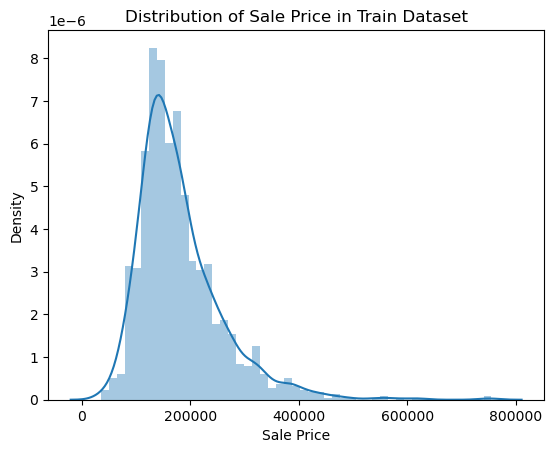

In [66]:
# Plot the distribution of the target variable 'SalePrice'
sns.distplot(houseData['SalePrice'])
# Add labels and title
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Distribution of Sale Price in Train Dataset')

# Display the plot
plt.show()

#### The above plot shows that the target variable 'SalePrice' in train dataset is normally distributed.

In [70]:
def correlation_houseData(df):
    """
    Calculate the correlation of numeric features (predictor variables) against the target variable 'SalePrice'.

    Args:
    - df (DataFrame): The input DataFrame containing the data.

    Returns:
    - Series: The correlation of each numeric feature with the target variable.
    """
    numeric_df = df.select_dtypes(include=np.number)  # Select numeric columns only
    corr_houseData = numeric_df.corr()['SalePrice']  # Calculate correlations
    return corr_houseData

# Calculate correlations and sort them in descending order
sorted_correlations = correlation_houseData(houseData).sort_values(ascending=False)

# Display sorted correlations
print("Correlations of numeric predictor variables with SalePrice (descending order):")
print(sorted_correlations)

Correlations of numeric predictor variables with SalePrice (descending order):
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass 

In [71]:
# Display descriptive statistics for numerical data in houseData DataFrame
numerical_data_description = houseData.describe().transpose()
print("Descriptive statistics for numerical data in houseData (before outlier treatment):")
print(numerical_data_description)

Descriptive statistics for numerical data in houseData (before outlier treatment):
                count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1460.0      69.863699     22.027677     21.0      60.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1460.0     103.117123    180.731373      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567

#### The predictor variable 'overall Quality, has the highest correlation towards the sale price of a house
#### Comparing overall Quality of the house with the other top 6 parametes to see how they are scattered

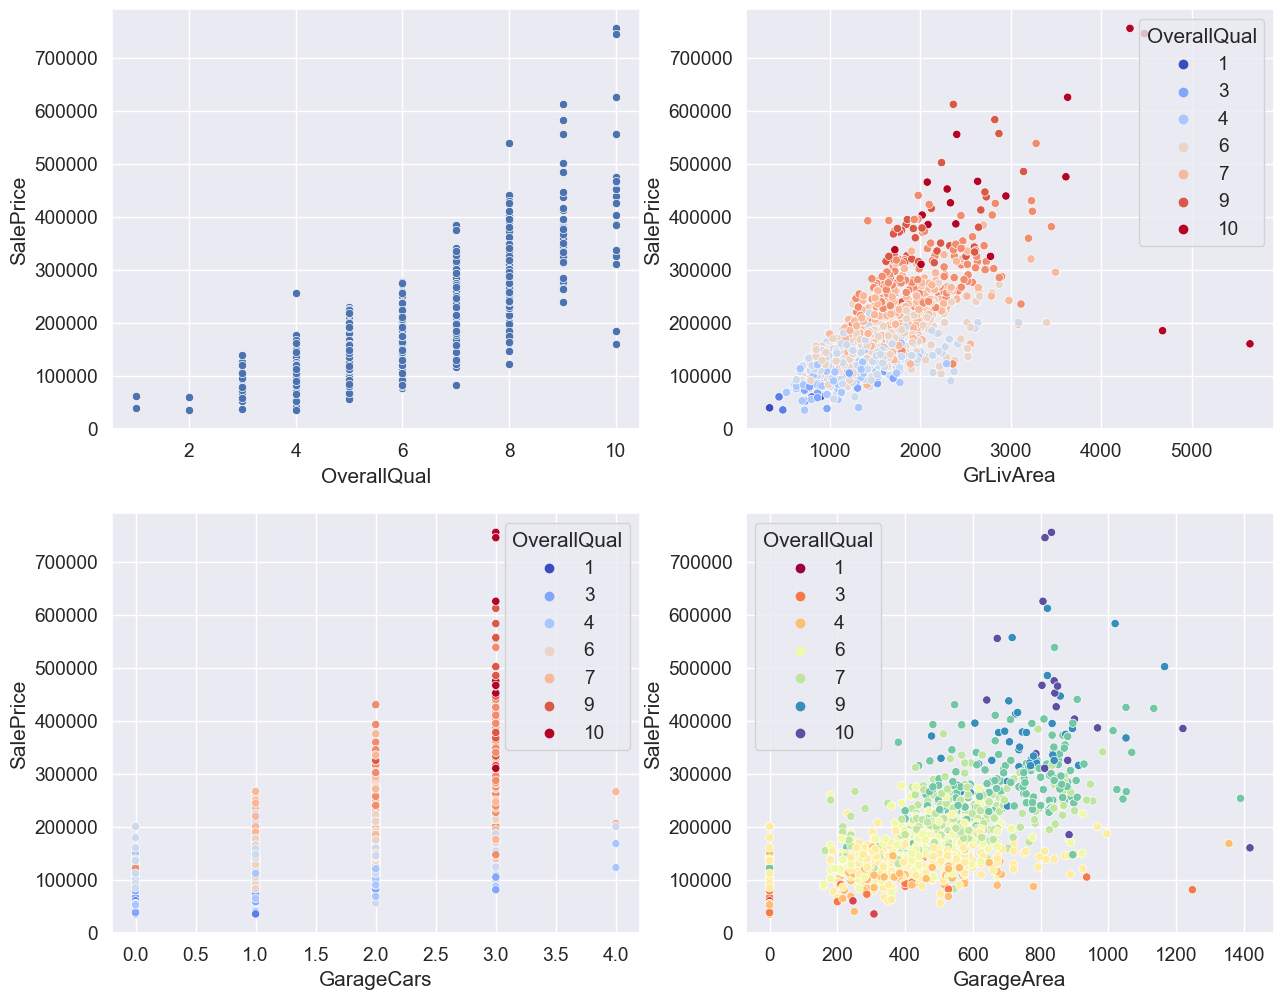

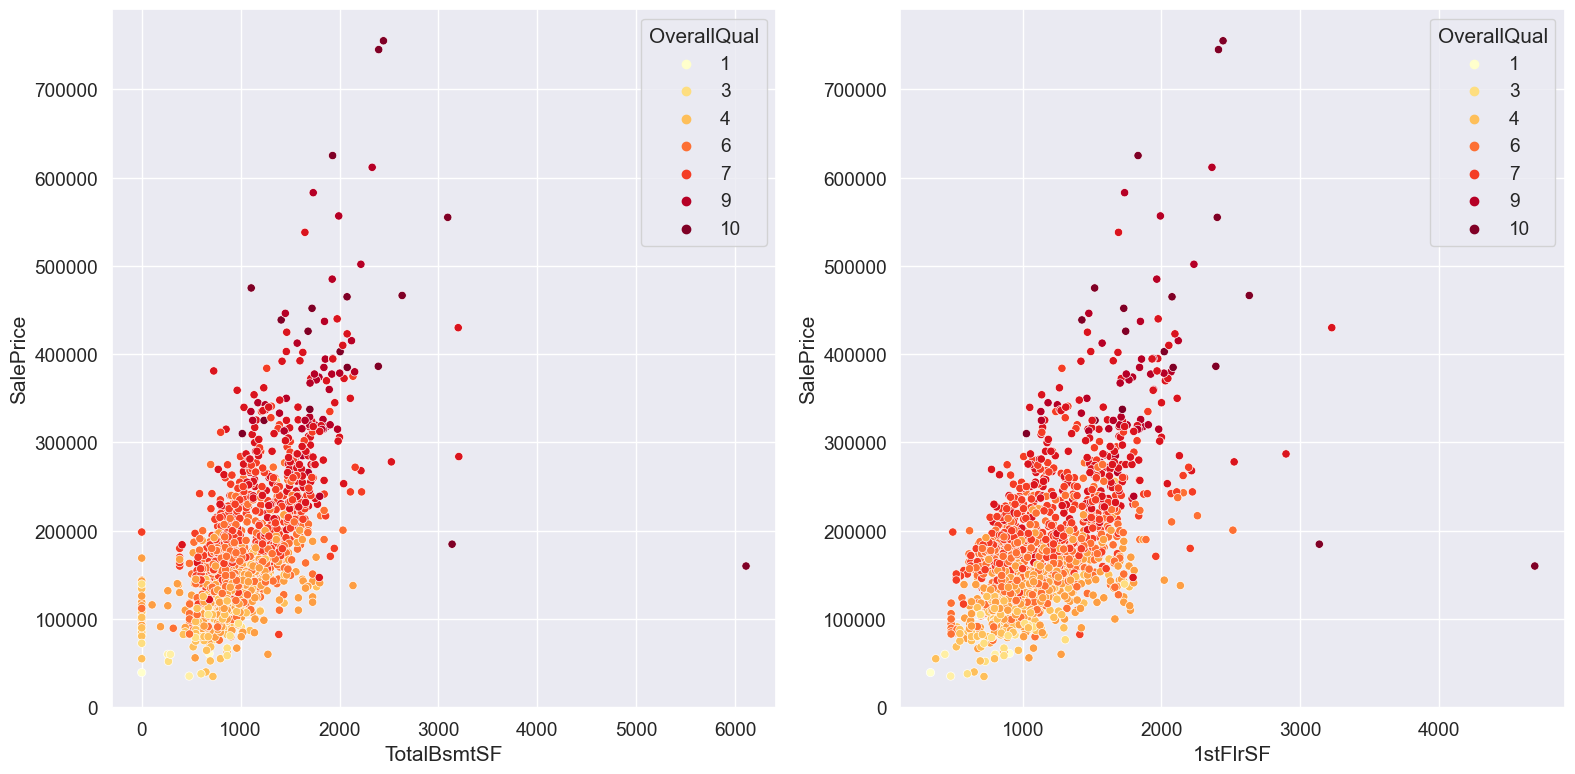

In [73]:
# Set the figure size and font scale
plt.figure(figsize=(15, 12))
sns.set(font_scale=1.25)

# Scatter plot OverallQual vs SalePrice
plt.subplot(221)
sns.scatterplot(x='OverallQual', y='SalePrice', data=houseData)

# Scatter plot GrLivArea vs SalePrice with OverallQual as hue
plt.subplot(222)
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=houseData, palette='coolwarm')

# Scatter plot GarageCars vs SalePrice with OverallQual as hue
plt.subplot(223)
sns.scatterplot(x='GarageCars', y='SalePrice', hue='OverallQual', data=houseData, palette='coolwarm')

# Scatter plot GarageArea vs SalePrice with OverallQual as hue
plt.subplot(224)
sns.scatterplot(x='GarageArea', y='SalePrice', hue='OverallQual', data=houseData, palette='Spectral')

# Set the figure size and subplot for additional scatter plots
plt.figure(figsize=(16, 8))
plt.subplot(121)
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', hue='OverallQual', data=houseData, palette='YlOrRd')

plt.subplot(122)
sns.scatterplot(x='1stFlrSF', y='SalePrice', hue='OverallQual', data=houseData, palette='YlOrRd')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


#### We could see that SalePrice of some houses with high living area are under 200000, which contradictory as high living area generally directly correlates to high house prices.
#### Hence removing those rows.

In [74]:
# Drop rows where GrLivArea > 5000 and SalePrice < 200,000
houseData = houseData.drop(houseData[(houseData['GrLivArea'] > 5000) & (houseData['SalePrice'] < 200000)].index)

# Display the new shape of the houseData DataFrame
print("New shape of houseData after removing outliers:", houseData.shape)

New shape of houseData after removing outliers: (1459, 81)


In [75]:
# Get the shape of the houseTest DataFrame
test_data_shape = houseTest.shape
print("Shape of houseTest DataFrame:", test_data_shape)

Shape of houseTest DataFrame: (1459, 73)


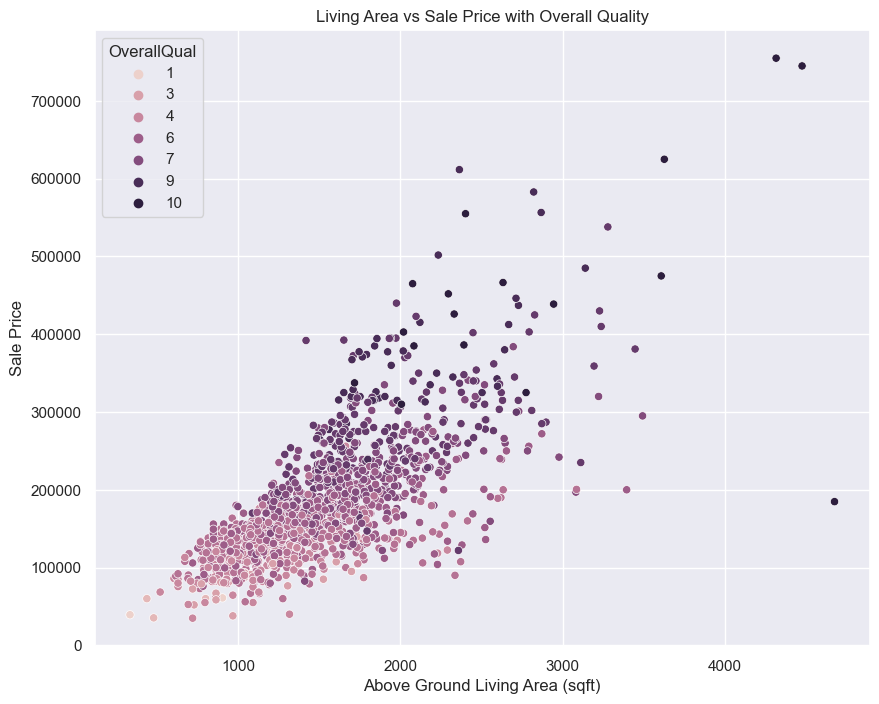

In [77]:
# Create a new figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the living area vs sale price with overall quality as hue
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='OverallQual', data=houseData, ax=ax)

# Set plot labels and title
ax.set_xlabel('Above Ground Living Area (sqft)')
ax.set_ylabel('Sale Price')
ax.set_title('Living Area vs Sale Price with Overall Quality')

# Show the plot
plt.show()

In [78]:
from datetime import date

# Get the current year
curr_year = date.today().year

# Calculate the age of the house for houseData DataFrame
houseData['age'] = curr_year - houseData['YearBuilt']

# Calculate the age of the house for houseTest DataFrame
houseTest['age'] = curr_year - houseTest['YearBuilt']

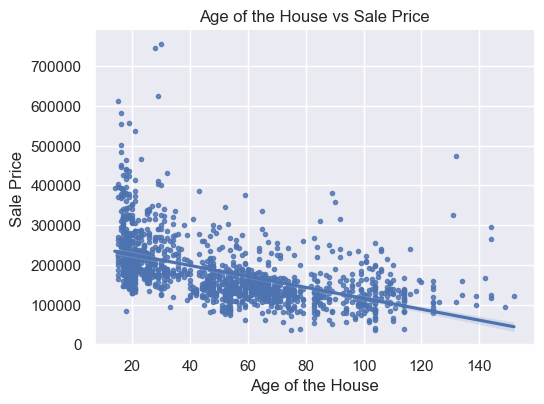

In [79]:
# Create a scatter plot with linear regression line
sns.lmplot(y='SalePrice', x='age', data=houseData, markers='.', aspect=1.4, height=4)

# Add labels and title
plt.xlabel('Age of the House')
plt.ylabel('Sale Price')
plt.title('Age of the House vs Sale Price')

# Show the plot
plt.show()

### From above plot, we can clearly see that newer the house, higher the price is. 

In [80]:
# Get the shape of the houseData DataFrame
data_shape = houseData.shape
print("Shape of houseData DataFrame:", data_shape)

Shape of houseData DataFrame: (1459, 82)


In [82]:
def find_categorical_columns(df):
    """
    Find categorical columns in a DataFrame.

    Args:
    - df (DataFrame): The input DataFrame containing the data.

    Returns:
    - list: A list of categorical column names.
    """
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    print("Number of categorical columns:", len(categorical_cols))
    print("\n")
    return categorical_cols

# Call the function for the houseData DataFrame
categorical_cols_train = find_categorical_columns(houseData)
print("Categorical columns in train dataset:", categorical_cols_train)

Number of categorical columns: 43


Categorical columns in train dataset: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [83]:
# Print the number of unique categories in each categorical column before conversion
print("Number of unique categories in each categorical column before conversion:")
print(houseData[categorical_cols_train].nunique())

# Convert categorical columns to the 'category' data type
for column in categorical_cols_train:
    houseData[column] = houseData[column].astype('category')

# Print the number of unique categories in each categorical column after conversion
print("\nNumber of unique categories in each categorical column after conversion:")
print(houseData[categorical_cols_train].nunique())


Number of unique categories in each categorical column before conversion:
MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          7
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

Number of unique categories in each categorical colu

In [84]:
# Identify categorical columns in the houseTest DataFrame
categorical_cols_test = find_categorical_columns(houseTest)

# Convert categorical columns to the 'category' data type
for column in categorical_cols_test:
    houseTest[column] = houseTest[column].astype('category')

Number of categorical columns: 37




In [85]:
# Check the data types of variables in the houseTest DataFrame
test_data_types = houseTest.dtypes
print("Data types of variables in the houseTest DataFrame:")
print(test_data_types)

Data types of variables in the houseTest DataFrame:
Id                  int64
MSSubClass          int64
MSZoning         category
LotArea             int64
Street           category
                   ...   
MoSold              int64
YrSold              int64
SaleType         category
SaleCondition    category
age                 int64
Length: 74, dtype: object


In [86]:
# Check the data types of variables in the houseData DataFrame
train_data_types = houseData.dtypes
print("Data types of variables in the houseData DataFrame:")
print(train_data_types)

Data types of variables in the houseData DataFrame:
Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
                   ...   
YrSold              int64
SaleType         category
SaleCondition    category
SalePrice           int64
age                 int64
Length: 82, dtype: object


In [87]:
# Display the column names of the houseData DataFrame
print("Column names of the houseData DataFrame:")
print(houseData.columns)

Column names of the houseData DataFrame:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'Gara

In [89]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode categorical variables to numerical values in the houseData DataFrame
for column in categorical_cols_train:
    houseData[column] = label_encoder.fit_transform(houseData[column])



# Display the head of the houseData DataFrame after encoding
print("Head of houseData DataFrame after label encoding:")
print(houseData.head())




Head of houseData DataFrame after label encoding:
   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      2         3   
1   2          20         3         80.0     9600       1      2         3   
2   3          60         3         68.0    11250       1      2         0   
3   4          70         3         60.0     9550       1      2         0   
4   5          60         3         84.0    14260       1      2         0   

   LandContour  Utilities  ...  PoolQC  Fence  MiscFeature  MiscVal  MoSold  \
0            3          0  ...       3      4            4        0       2   
1            3          0  ...       3      4            4        0       5   
2            3          0  ...       3      4            4        0       9   
3            3          0  ...       3      4            4        0       2   
4            3          0  ...       3      4            4        0      12   

   YrS

In [90]:
# Encode categorical variables to numerical values in the houseTest DataFrame
for column in categorical_cols_test:
    houseTest[column] = label_encoder.fit_transform(houseTest[column])
    
# Display the head of the houseTest DataFrame after encoding
print("\nHead of houseTest DataFrame after label encoding:")
print(houseTest.head())


Head of houseTest DataFrame after label encoding:
     Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0  1461          20         2    11622       1         3            3   
1  1462          20         3    14267       1         0            3   
2  1463          60         3    13830       1         0            3   
3  1464          60         3     9978       1         0            3   
4  1465         120         3     5005       1         0            1   

   LotConfig  LandSlope  Neighborhood  ...  EnclosedPorch  3SsnPorch  \
0          4          0            12  ...              0          0   
1          0          0            12  ...              0          0   
2          4          0             8  ...              0          0   
3          4          0             8  ...              0          0   
4          4          0            22  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \

In [91]:
# Calculate correlations and sort them in descending order
sorted_correlations = correlation_houseData(houseData).sort_values(ascending=False)

# Display sorted correlations
print("Correlations of predictor variables with SalePrice (descending order):")
print(sorted_correlations)


Correlations of predictor variables with SalePrice (descending order):
SalePrice       1.000000
OverallQual     0.793678
GrLivArea       0.725570
TotalBsmtSF     0.645749
GarageCars      0.640502
                  ...   
age            -0.523395
GarageFinish   -0.537951
KitchenQual    -0.591325
BsmtQual       -0.619997
ExterQual      -0.640508
Name: SalePrice, Length: 82, dtype: float64


### 3. Data Preparation for model building 

In [96]:
# Split into X and y
X = houseData.drop(['SalePrice'], axis=1)
y = houseData['SalePrice']

In [100]:
# Display the head of X
print("Predictor variables (X):")
X.head()

Predictor variables (X):


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,age
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,21
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,48
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,23
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,109
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,24


In [120]:
X.shape

(1459, 81)

In [121]:
y.shape

(1459,)

In [101]:
# Display the head of y
print("\nTarget variable (y):")
y.head()


Target variable (y):


0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [103]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 388.9 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/1.3 MB 655.4 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.3 MB 980.4 kB/s eta 0:00:02
   -------- ------------------------------- 0.3/1.3 MB 1.2 MB/s eta 0:00:01
   ------------- -------------------------- 0.4/1.3 MB 1.6 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.3 MB 1.8 MB/s eta 0:00:01
   ---------------------- ----------------- 0.8/1.3 MB 2.1 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/

In [104]:
# Regression models
from sklearn.linear_model import ElasticNet, Lasso, BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge

# Preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

# Base classes for building custom estimators
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

# Model evaluation and cross-validation
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

# Gradient boosting libraries
import xgboost as xgb
import lightgbm as lgb

### 4. Model Building and Prediction

In [107]:
# Lasso regression model
lasso = make_pipeline(
    RobustScaler(),
    Lasso(alpha=0.0005, random_state=1)
)

# Elastic Net regression model
ENet = make_pipeline(
    RobustScaler(),
    ElasticNet(alpha=0.0005, l1_ratio=0.9, random_state=3)
)

# Kernel Ridge regression model
KRR = KernelRidge(
    alpha=0.6,
    kernel='polynomial',
    degree=2,
    coef0=2.5
)

# Gradient Boosting regression model
GBoost = GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.05,
    max_depth=4,
    max_features='sqrt',
    min_samples_leaf=15,
    min_samples_split=10,
    loss='huber',
    random_state=5
)

# XGBoost regression model
model_xgb = xgb.XGBRegressor(
    colsample_bytree=0.4603,
    gamma=0.0468,
    learning_rate=0.05,
    max_depth=3,
    min_child_weight=1.7817,
    n_estimators=2200,
    reg_alpha=0.4640,
    reg_lambda=0.8571,
    subsample=0.5213,
    silent=1,
    random_state=7,
    nthread=-1
)

# LightGBM regression model
model_lgb = lgb.LGBMRegressor(
    objective='regression',
    num_leaves=5,
    learning_rate=0.05,
    n_estimators=720,
    max_bin=55,
    bagging_fraction=0.8,
    bagging_freq=5,
    feature_fraction=0.2319,
    feature_fraction_seed=9,
    bagging_seed=9,
    min_data_in_leaf=6,
    min_sum_hessian_in_leaf=11
)

In [111]:
# Define the number of folds for cross-validation
n_folds = 10

# Define a function to calculate Root Mean Squared Logarithmic Error (RMSLE) using cross-validation
def rmsle_cv(model):
    # Initialize KFold cross-validator with shuffling
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Get the number of splits for cross-validation
    kf.get_n_splits(X.values)
    
    # Calculate RMSE using cross-validation
    rmse = np.sqrt(-cross_val_score(model, X.values, y.values, scoring="neg_mean_squared_error", cv=kf))
    
    return rmse


#### Lasso and ElasticNet score obtained without stacking different Algorithms. 

In [114]:
# Calculate RMSLE score using cross-validation for the Lasso model
score = rmsle_cv(lasso)

# Print the mean and standard deviation of the scores
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))



Lasso score: 31131.5875 (8936.6038)



In [115]:
# Calculate RMSLE score using cross-validation for the ElasticNet model
score = rmsle_cv(ENet)

# Print the mean and standard deviation of the scores
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


ElasticNet score: 31076.2241 (8892.9871)



#### rmse score should always be minimum as it's the square of error score. Hence low value of rmse score means our prediction is closer to actual value.

Next, we can further reduce the rmse score by ensemble method i.e by stacking 3 differnt models using 3 differnt algorithms and creating a metamodel.

This metamodel inturn can be used for prediction.

In [116]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        """
        Stacking Averaged Models constructor.

        Parameters:
        base_models (list): List of base models for stacking.
        meta_model: Meta-model used for stacking.
        n_folds (int): Number of folds for cross-validation.
        """
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
    
    def fit(self, X, y):
        """
        Fit the StackingAveragedModels on the training data.

        Parameters:
        X (array-like): Training data.
        y (array-like): Target values.

        Returns:
        self: Returns an instance of self.
        """
        self.base_models_ = [list() for _ in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    def predict(self, X):
        """
        Predict using the StackingAveragedModels.

        Parameters:
        X (array-like): Test data.

        Returns:
        array-like: Predicted target values.
        """
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)

In [117]:
# Define the base models and meta-model for stacking
base_models = (ENet, GBoost, KRR, model_xgb, model_lgb)
meta_model = lasso

# Create a StackingAveragedModels instance
stacked_averaged_models = StackingAveragedModels(base_models=base_models, meta_model=meta_model)

# Calculate RMSLE score using cross-validation for the stacked model
score = rmsle_cv(stacked_averaged_models)

# Print the mean and standard deviation of the scores
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [123]:
X.shape

(1459, 81)

In [124]:
y.shape

(1459,)

In [125]:
# Fit the stacked ensemble model to the training data
stacked_averaged_models.fit(X.values, y.values)

# Make predictions on the test data using the stacked ensemble model
stacked_pred = stacked_averaged_models.predict(houseTest.values)

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

ValueError: X has 74 features, but RobustScaler is expecting 81 features as input.

In [ ]:
# Create a DataFrame with the predictions
solution = pd.DataFrame(stacked_pred, columns=["SalePrice"])

# Save the DataFrame to a CSV file
solution.to_csv("submission.csv", index_label="Id")

#### We can see that by using stacking technique we have now brought down the error score to a lower value than earlier, which inturn means our prediction is closer to the Actual SalePrice of the house. 